# Intro analysis

În cadrul proiectului am folosit dataset-ul Housing. El permite analiza și prelucrarea datelor pentru a înțelege factorii care influențează prețurile caselor și pentru a dezvolta preziceri in raport cu piețele imobiliare.

In [133]:
import pandas as pd #importăm toate librăriile de care vom avea nevoie
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns

In [134]:
housing = pd.read_csv('/content/drive/MyDrive/IT/Housing.csv') #importam csv-ul

In [135]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [136]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [137]:
housing.isnull().sum() #nr de celule cu valori lipsa in coloane

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [138]:
housing.isnull().sum(axis=1) #nr de celule cu valori lipsa in randuri

0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    0
542    0
543    0
544    0
Length: 545, dtype: int64

In [139]:
housing.shape #nr randuri/coloane

(545, 13)

In [140]:
for index, row in housing.iterrows():            #verificam daca sunt dublicate
    if housing.duplicated:
       housing = housing.drop_duplicates()

# Graphs

Prin construirea graficelor analizam raportul dintre coloanele setului de date.

In [141]:
housing['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [142]:
#inlocuim outliers cu media fiecarei coloane
numeric_housing = housing.select_dtypes(include=[np.number])

iqr_multiplier = 1.5

Q1 = numeric_housing.quantile(0.25)
Q3 = numeric_housing.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((numeric_housing < (Q1 - iqr_multiplier * IQR)) | (numeric_housing > (Q3 + iqr_multiplier * IQR)))


for col in numeric_housing.columns:
    col_median = numeric_housing[col].median()
    housing.loc[outlier_mask[col], col] = col_median

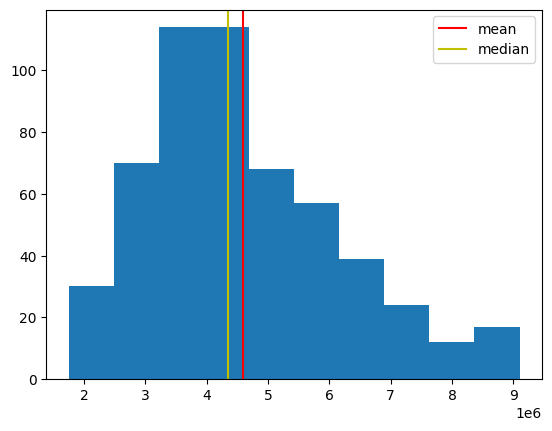

In [143]:
plt.hist(housing['price']);
plt.axvline(housing['price'].mean(), color='r', label = "mean")
plt.axvline(housing['price'].median(), color='y', label = "median")
plt.legend()

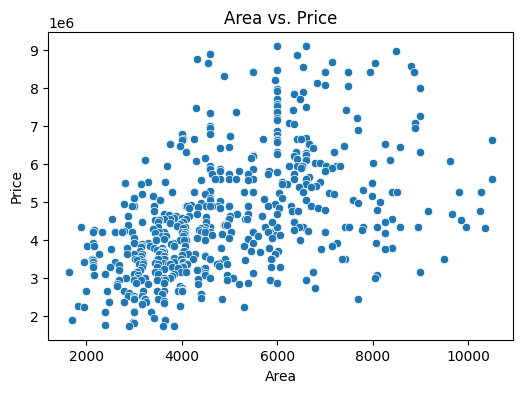

In [144]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="area", y="price", data=housing)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs. Price")
plt.show()

<Figure size 600x400 with 0 Axes>

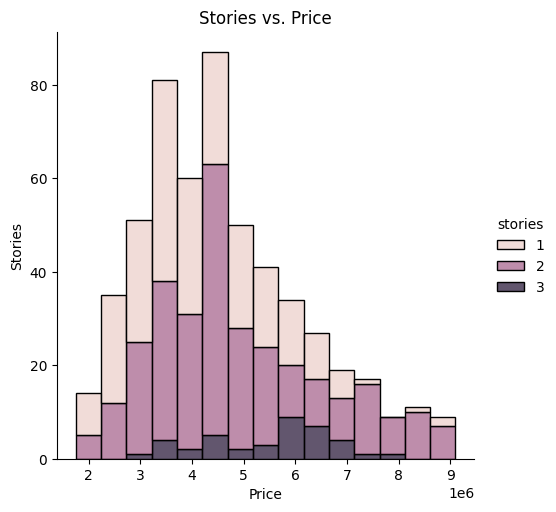

In [145]:
plt.figure(figsize=(6, 4))
sns.displot(data=housing, x="price", hue="stories", multiple="stack")
plt.xlabel("Price")
plt.ylabel("Stories")
plt.title("Stories vs. Price")
plt.show()

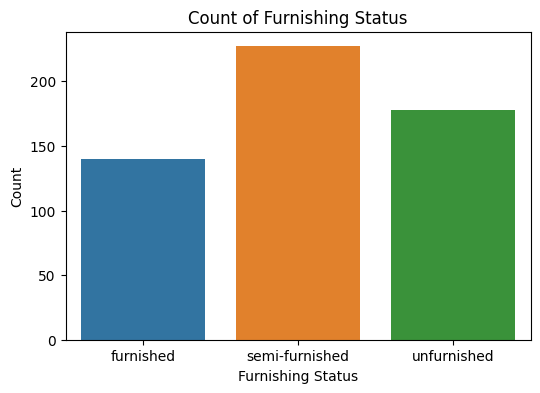

In [146]:
plt.figure(figsize=(6, 4))
sns.countplot(x="furnishingstatus", data=housing)
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.title("Count of Furnishing Status")
plt.show()

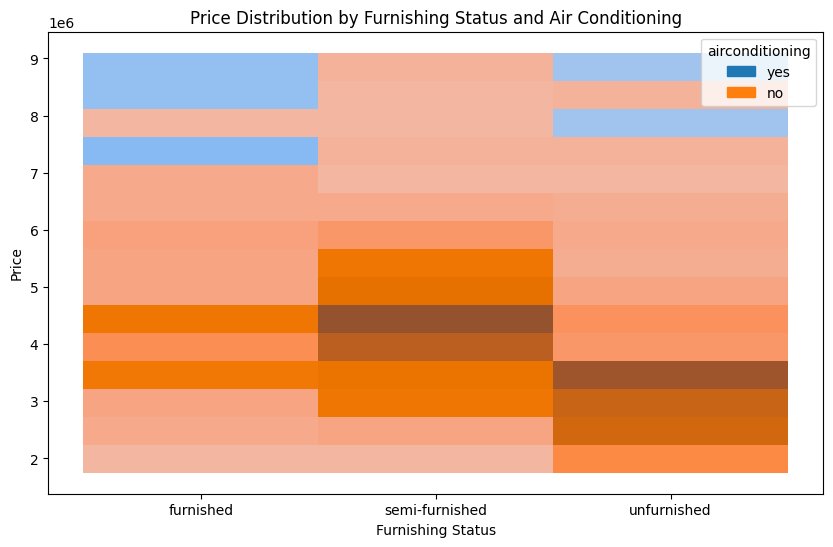

In [147]:
plt.figure(figsize=(10, 6))
sns.histplot(x="furnishingstatus", y="price", hue="airconditioning", data=housing)
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.title("Price Distribution by Furnishing Status and Air Conditioning")
plt.show()

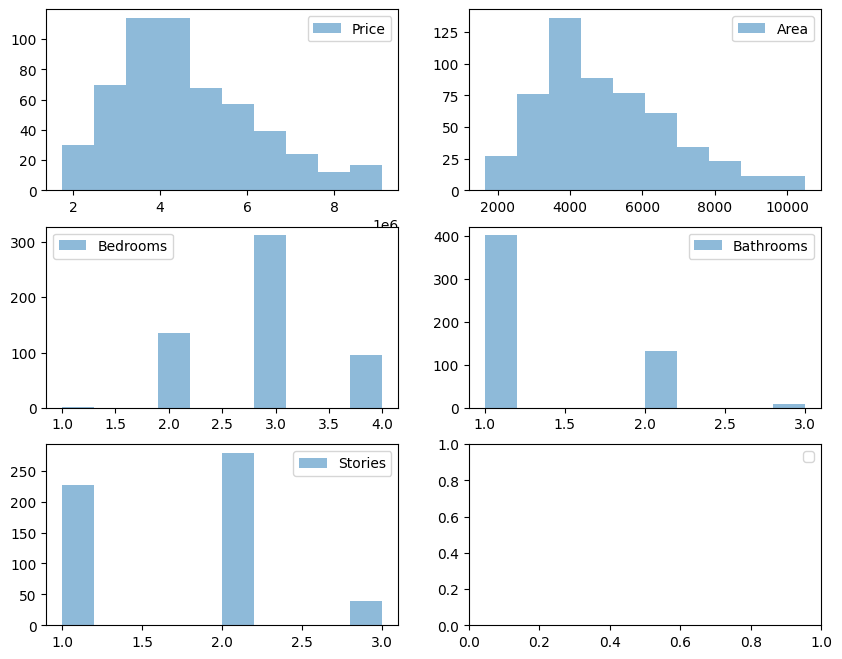

In [148]:
price = housing['price']
area = housing['area']
bedrooms = housing['bedrooms']
bathrooms = housing['bathrooms']
stories = housing['stories']

fig, ((ax1, ax2), (ax3, ax4), (ax5,_)) = plt.subplots(3, 2, figsize=(10,8))
ax1.hist(price, alpha=0.5, label='Price')
ax1.legend()
ax2.hist(area, alpha=0.5, label='Area')
ax2.legend()
ax3.hist(bedrooms, alpha=0.5, label='Bedrooms')
ax3.legend()
ax4.hist(bathrooms, alpha=0.5, label='Bathrooms')
ax4.legend()
ax5.hist(stories, alpha=0.5, label='Stories')
ax5.legend()
_.legend(['Unused Subplot'])

In [149]:
mainroad = housing['mainroad']
guestroom = housing['guestroom']
basement = housing['basement']
hotwaterheating = housing['hotwaterheating']
airconditioning = housing['airconditioning']
prefarea = housing['prefarea']

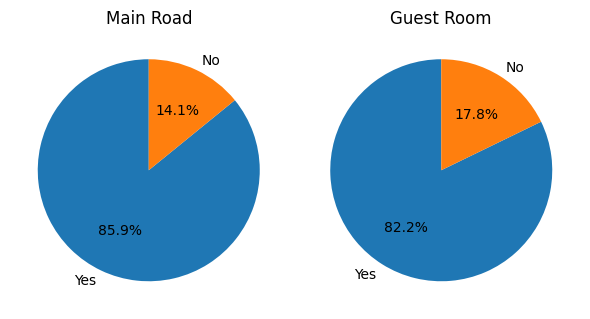

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4))
labels = ['Yes', 'No']

for i, (ax, data, label) in enumerate(zip(axes, [mainroad, guestroom], ['Main Road', 'Guest Room'])):
    counts = data.value_counts()
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{label}')

plt.tight_layout()

plt.show()


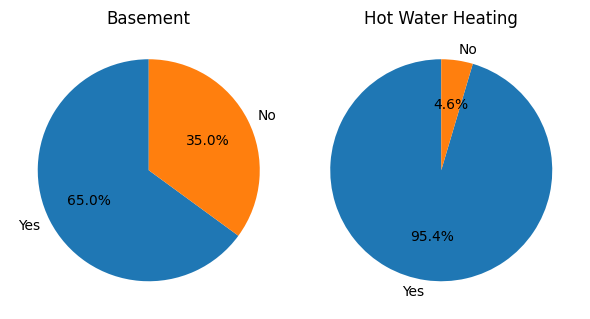

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4))
labels = ['Yes', 'No']

for i, (ax, data, label) in enumerate(zip(axes, [basement, hotwaterheating], ['Basement', 'Hot Water Heating'])):
    counts = data.value_counts()
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{label}')

plt.tight_layout()

plt.show()


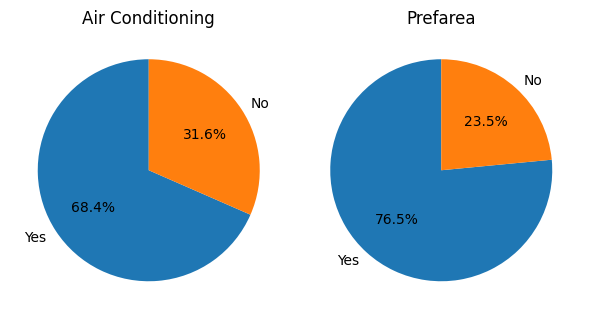

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4))
labels = ['Yes', 'No']

for i, (ax, data, label) in enumerate(zip(axes, [airconditioning, prefarea], ['Air Conditioning', 'Prefarea'])):
    counts = data.value_counts()
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{label}')

plt.tight_layout()

plt.show()


# Data Transformation

Transformam coloanele de tip 'object' in 'int' pentru a le putea utiliza la antrenarea modelului.

In [153]:
mapping = {'yes': 1, 'no': 0}
columns_to_transform = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in columns_to_transform:
    housing[col] = housing[col].map(mapping)

In [154]:
furnishing_status_ohe = pd.get_dummies(housing['furnishingstatus'], prefix='furnishing')
housing = pd.concat([housing, furnishing_status_ohe], axis=1)
housing.drop('furnishingstatus', axis=1, inplace=True)

# Model making and training

Pentru a crea si antrena modelul, incercam mai multe tipuri de regresoare sa observam care din ele este mai compatibil cu dataset-ul respectiv.

In [155]:
X = housing.drop('price', axis=1)
y = housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Bagging' : BaggingRegressor(),
}

In [157]:
Name = ['Decision Tree','Random Forest','Gradient Boosting Regressor' ,'ADA Boost', 'Bagging' ]
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    print(f"Results for {name}:")
    print("Accuracy:", r2)
    accuracy.append(r2)
    print()

Results for Decision Tree:
Accuracy: 0.28141008460461325

Results for Random Forest:
Accuracy: 0.49584095366697856

Results for Gradient Boosting Regressor:
Accuracy: 0.5043408334515211

Results for ADA Boost:
Accuracy: 0.4948073335899097

Results for Bagging:
Accuracy: 0.44711280816894516



# Concluzii

Modelul pe care l-am creat da o acuratete destul de mica, intre 40-50%, mai ales dupa inlocuirea outliers cu media pe coloana. Poate fi cauzata de insuficienta de date in dataset sau a algoritmului neeficient folosit pentru eliminare outliers. Desi Gradient Boosting Regressor da cea mai mare acuratete, n-as sugera sa fie folosit acest model in ulterioare proiecte reale.  